<a href="https://colab.research.google.com/github/ArundhatiV/Data-Visualliation.Neurons/blob/main/Data_Visuallization_using_Profiling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 22.0 MB 1.4 MB/s 
     |████████████████████████████████| 102 kB 11.9 MB/s 
     |████████████████████████████████| 690 kB 63.5 MB/s 
     |████████████████████████████████| 4.7 MB 72.8 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
     |████████████████████████████████| 9.8 MB 46.0 MB/s 
     |████████████████████████████████| 296 kB 74.5 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.3.1-py2.py3-none-any.whl size=310107 sha256=31a1e70c0c8e53240c5f8a11336b972f78744f91faaf8c582398b7f926b3dfa9
  Stored in directory: /tmp/pip-ephem-wheel-cache-qpa88lia/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=fcf1c2af32c0a6a8cb87911945a62005998c400005deabb65b92f9f77b4a3fe5
  Stored in directory: /root/.cache/pip/whe

In [3]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
df= pd.read_excel("/content/gdrive/MyDrive/Data Visualization Assignmnet.xlsx")

In [6]:
print(df)

          DATE DESCRIPTION  UNIT          PLACE
0   2022-04-01        Beef   1.0    Kolenchery 
1   2022-04-01        Fish   1.0    Kolenchery 
2   2022-04-03        Beef   2.0  Tripunithura 
3   2022-04-05      Prawns   1.0     Bangalore 
4   2022-04-06       Dates   1.0      Mangalore
..         ...         ...   ...            ...
106 2022-07-05       Lemon   4.0            NaN
107 2022-07-08        Beef   1.0            NaN
108 2022-07-15        Beef   1.0            NaN
109 2022-07-15      Prawns   1.0            NaN
110 2022-07-15       Lemon   1.0            NaN

[111 rows x 4 columns]


In [7]:
from pandas_profiling import ProfileReport

In [8]:
profile = ProfileReport(df, title='Pandas profile report', html={'style':{'full width':True}})

In [9]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# **Conclusion**


- Dataset has 5 (4.5%) duplicate rows	Duplicates

- DATE is highly correlated with UNIT and place	High correlation
 
- UNIT is highly correlated with DATE and place	High correlation

- PLACE is highly correlated with DATE and unit	High correlation

- PLACE has 8 (7.2%) missing values


**Dataset statistics**

- Number of variables	4
- Number of observations	111
- Missing cells	8
- Duplicate rows	5

**What can be done?**
- Need to remove missing values.
- Need to remove duplicate rows.


# **Insights**

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

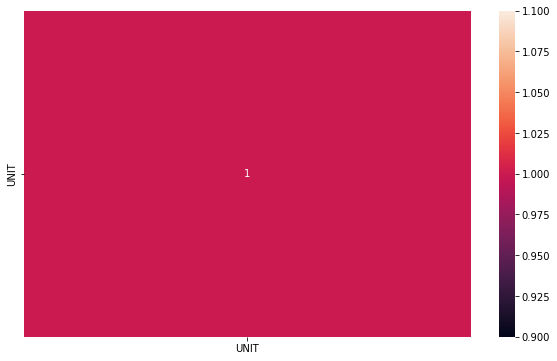

In [11]:
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

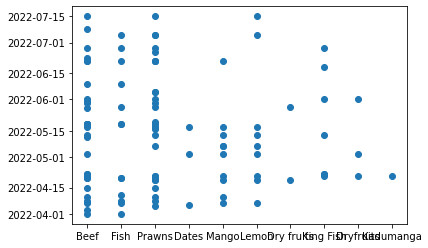

In [12]:
plt.scatter(df.DESCRIPTION,df.DATE)

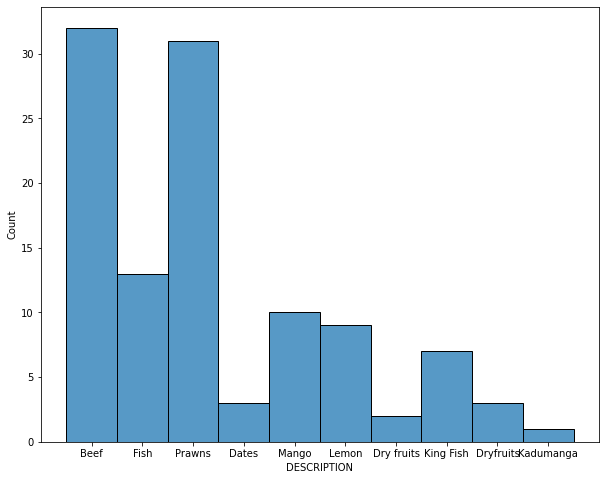

In [13]:
plt.figure(figsize= (10,8))
sns.histplot(df['DESCRIPTION'])

Beef and Prawns are highest selling product.

<Figure size 7200x2880 with 0 Axes>

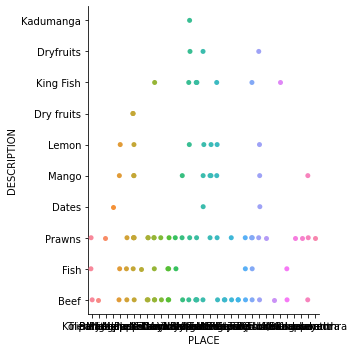

In [14]:
plt.figure(figsize= (100,40))
sns.catplot(data=df, x="PLACE", y="DESCRIPTION")

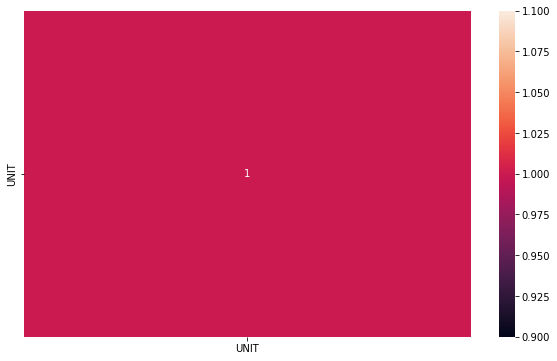

In [15]:
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

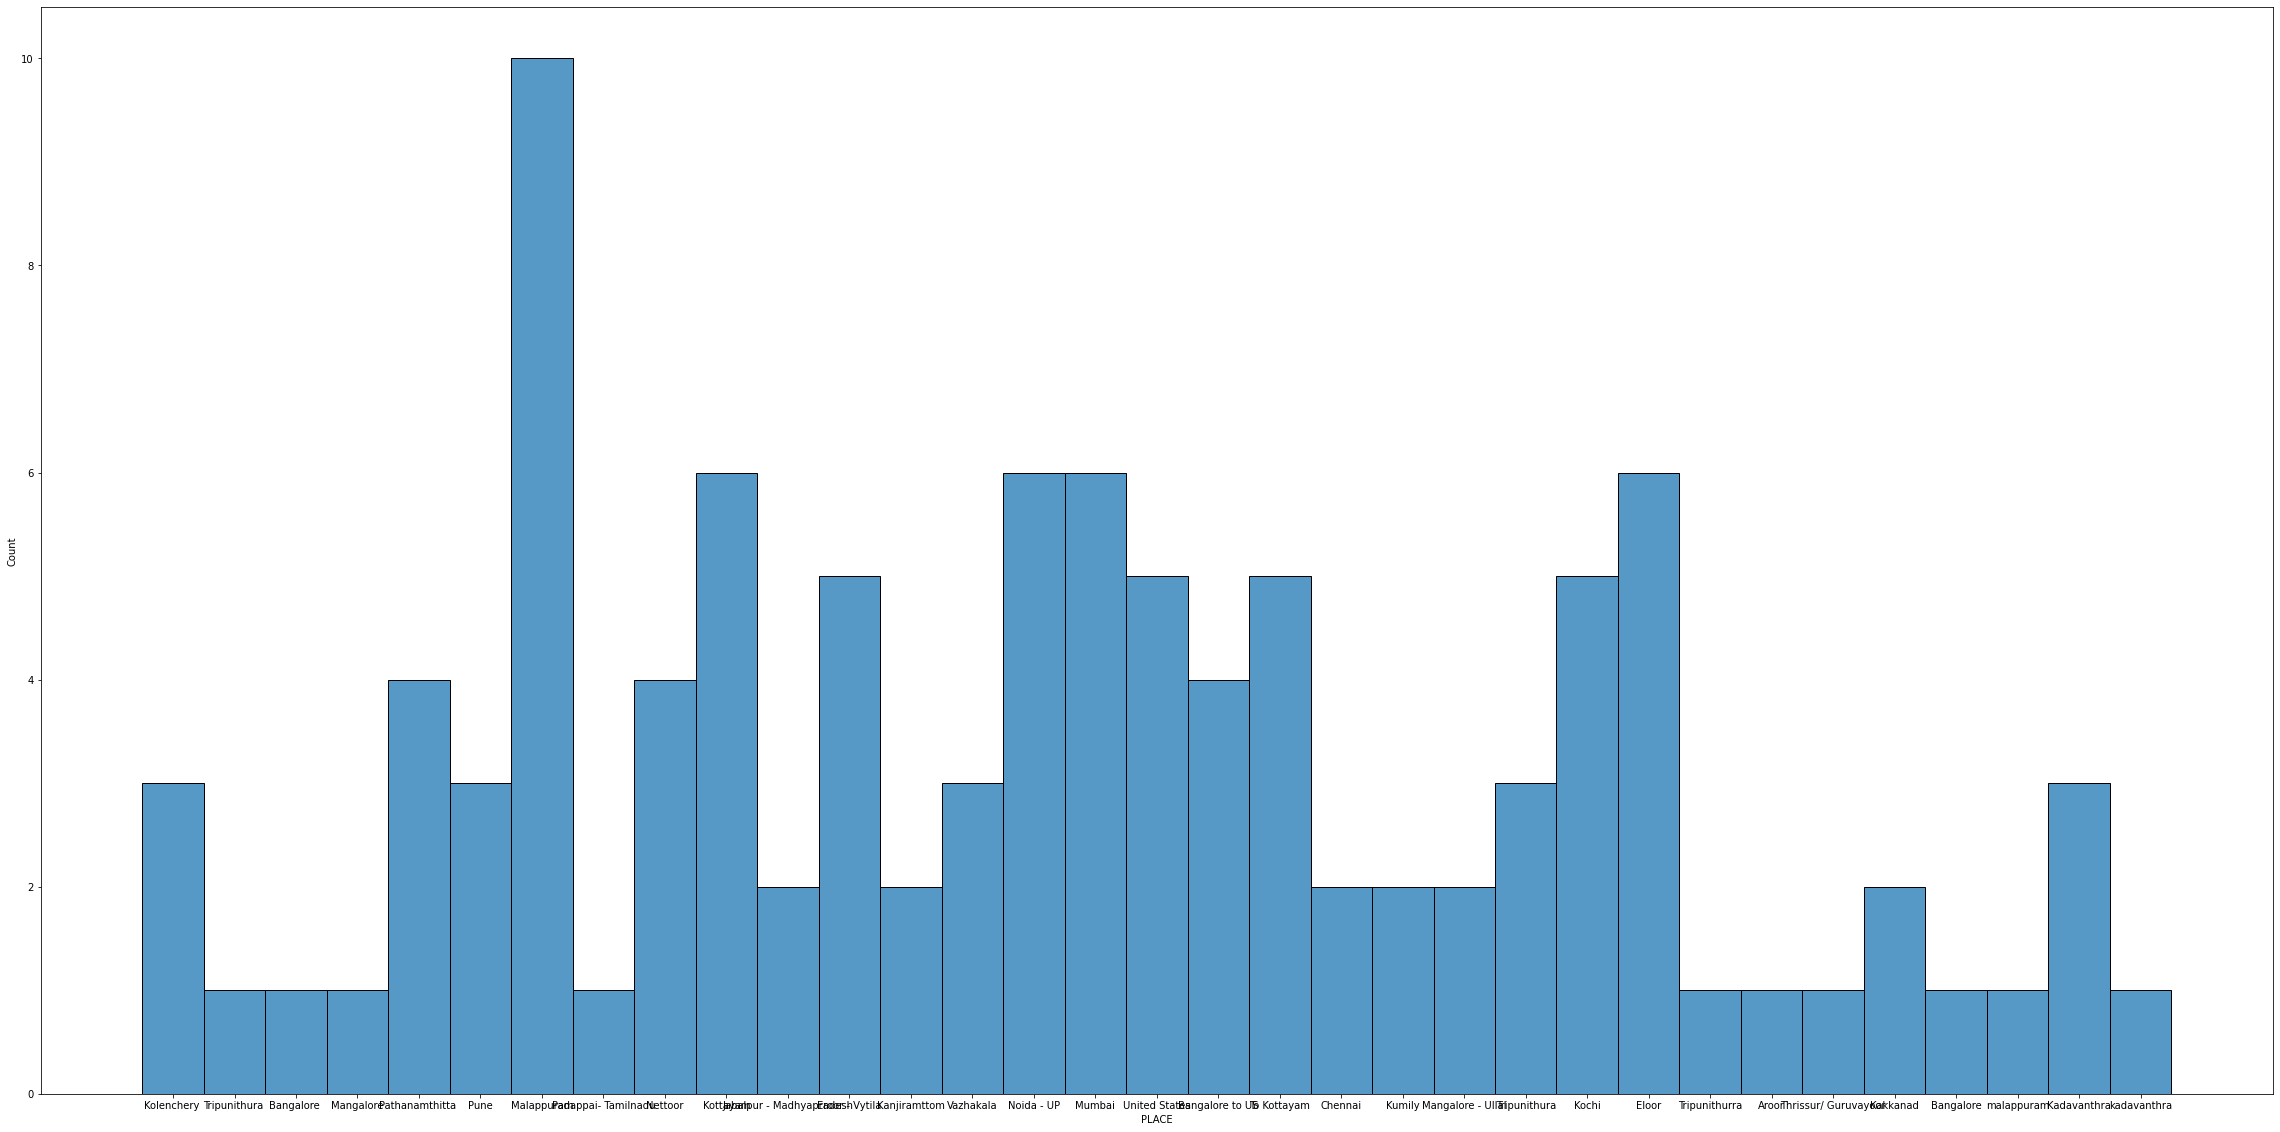

In [24]:
plt.figure(figsize= (40,20))
plt.xticks(fontsize=10)
sns.histplot(df['PLACE'])

- Mallapuram is city where highest sell is done. 'Place' column is not normally distributed.

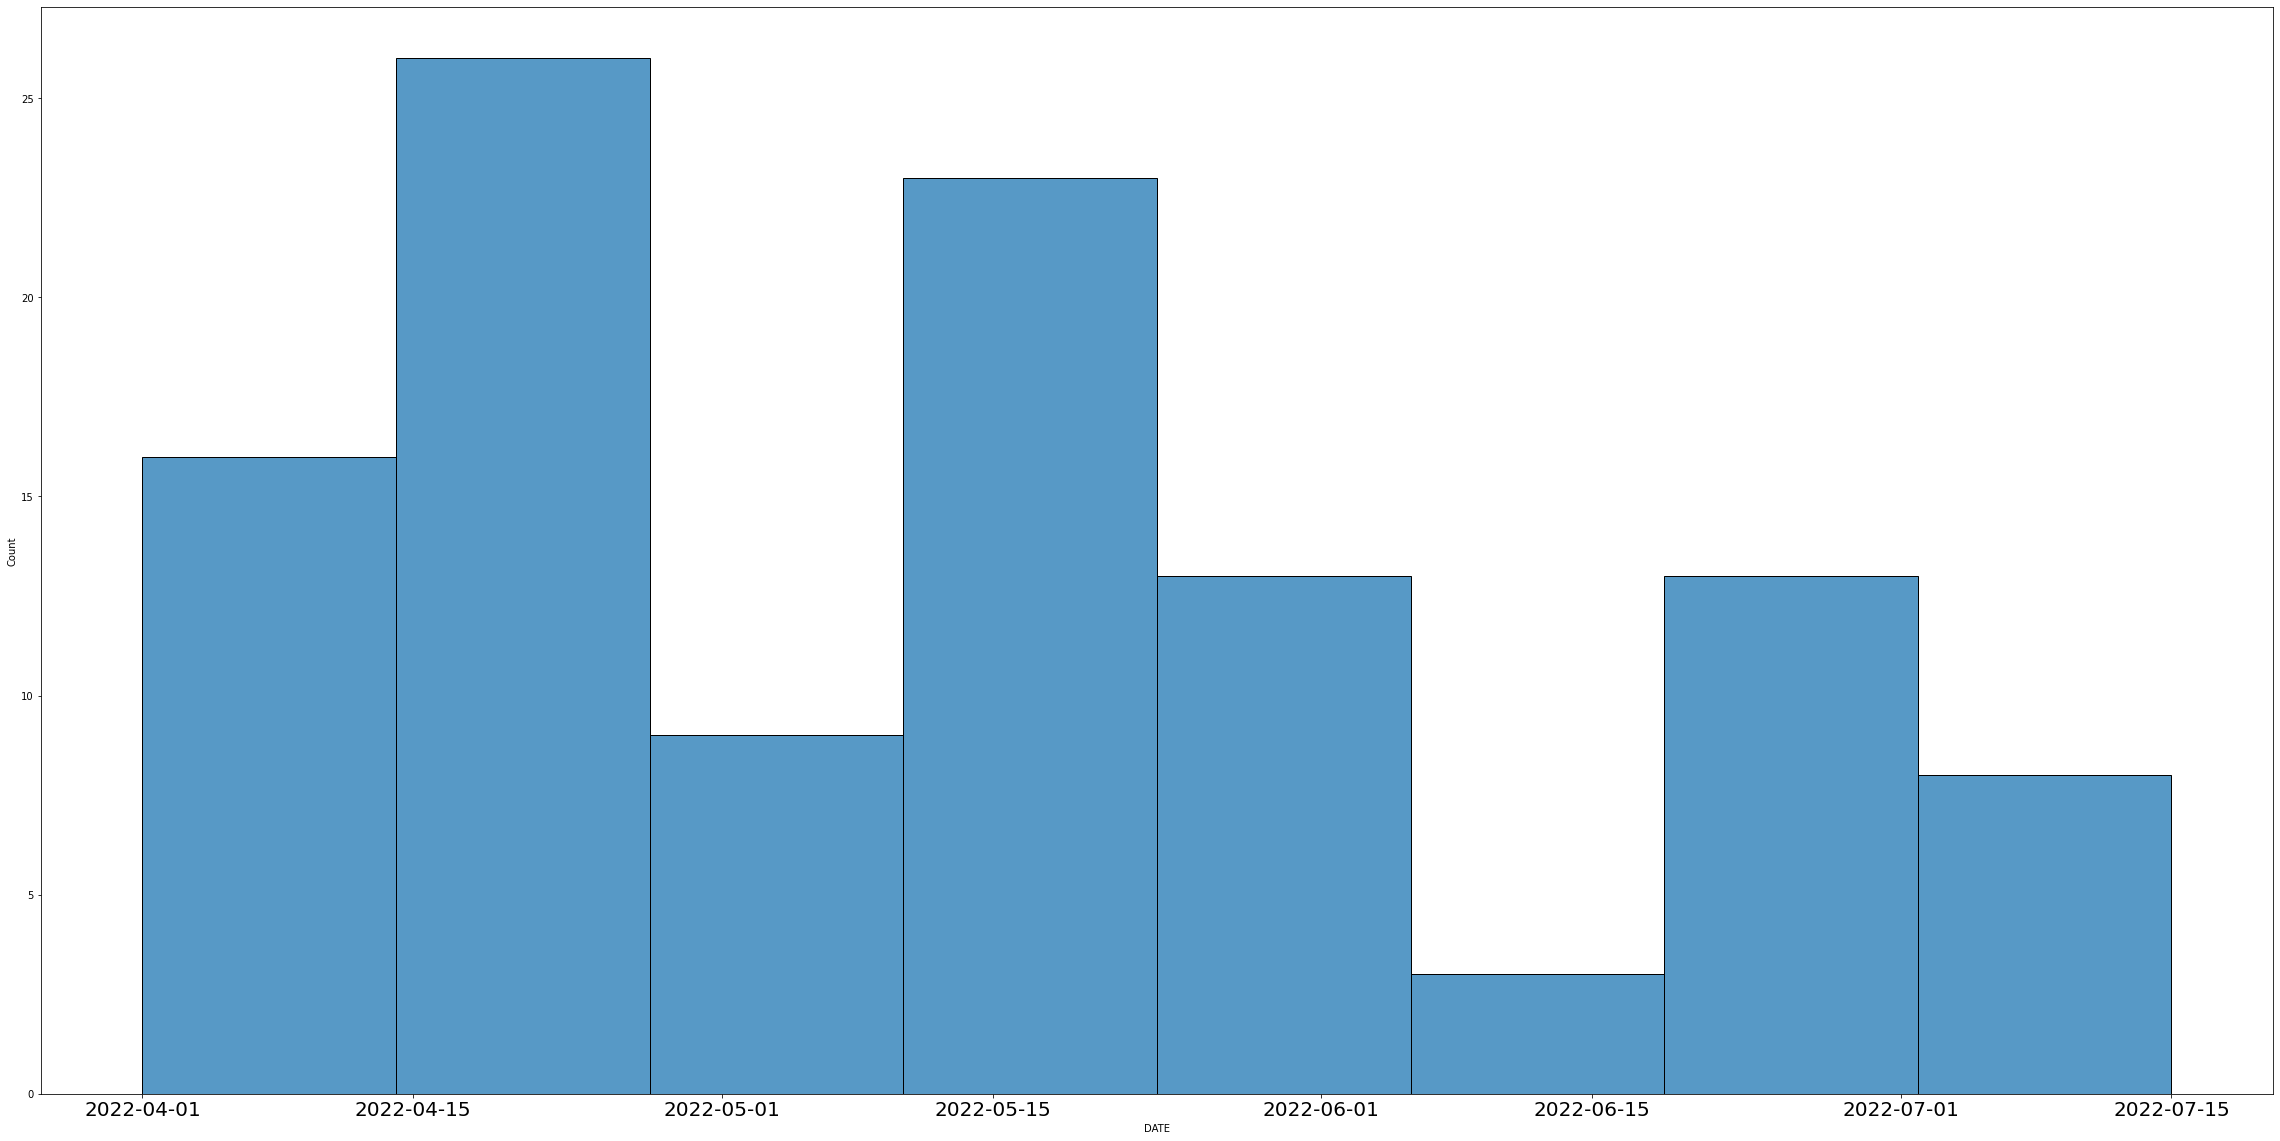

In [23]:
plt.figure(figsize= (40,20))
plt.xticks(fontsize=20)
sns.histplot(df['DATE'])

On date 15/04/2022 and 15/05/2022 highest sell is done.Date column is not normally distributed.

In [25]:
df.describe()

,UNIT
count,111.000000
mean,1.720721
std,1.088545
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,6.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         111 non-null    datetime64[ns]
 1   DESCRIPTION  111 non-null    object        
 2   UNIT         111 non-null    float64       
 3   PLACE        103 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.6+ KB


In [27]:
df.isna().sum()

DATE           0
DESCRIPTION    0
UNIT           0
PLACE          8
dtype: int64

In [37]:
df['PLACE'].mode()

0    Malappuram
dtype: object

In [45]:
df.dropna(subset= ['PLACE'],inplace = True)
df.shape

(103, 4)

In [46]:
df.duplicated

<bound method DataFrame.duplicated of           DATE DESCRIPTION  UNIT          PLACE
0   2022-04-01        Beef   1.0    Kolenchery 
1   2022-04-01        Fish   1.0    Kolenchery 
2   2022-04-03        Beef   2.0  Tripunithura 
3   2022-04-05      Prawns   1.0     Bangalore 
4   2022-04-06       Dates   1.0      Mangalore
..         ...         ...   ...            ...
98  2022-06-26      Prawns   1.0          Kochi
99  2022-06-28      Prawns   4.0       Kottayam
100 2022-06-28        Fish   3.0       Kottayam
101 2022-06-28   King Fish   1.0       Kottayam
102 2022-06-28        Beef   4.0       Kottayam

[103 rows x 4 columns]>

In [47]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of           DATE DESCRIPTION  UNIT          PLACE
0   2022-04-01        Beef   1.0    Kolenchery 
1   2022-04-01        Fish   1.0    Kolenchery 
2   2022-04-03        Beef   2.0  Tripunithura 
3   2022-04-05      Prawns   1.0     Bangalore 
4   2022-04-06       Dates   1.0      Mangalore
..         ...         ...   ...            ...
98  2022-06-26      Prawns   1.0          Kochi
99  2022-06-28      Prawns   4.0       Kottayam
100 2022-06-28        Fish   3.0       Kottayam
101 2022-06-28   King Fish   1.0       Kottayam
102 2022-06-28        Beef   4.0       Kottayam

[103 rows x 4 columns]>